In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import statsmodels.api as sm
py.offline.init_notebook_mode(connected=True)


In [2]:
stats = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\county_facts.csv" , )
pd.set_option('display.max_columns', 50)
stats.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,...,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,...,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,...,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,...,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,...,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,...,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [3]:
stats = stats[['fips','area_name','state_abbreviation','PST045214','AGE775214','RHI225214','RHI725214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210','RHI425214','SBO001207','SEX255214']].copy()
stats.rename(columns={'PST045214': 'Population', 'AGE775214': 'Age > 65','RHI225214':'Black','RHI725214':'Latino','RHI825214':'White','EDU635213':'HighSchool','EDU685213':'College','INC110213':'Median Household','PVY020213':'Poverty level','POP060210':'Population PSMile', 'RHI425214':'Asian', 'SBO001207':'Firms','SEX255214':'Females'}, inplace=True)
stats

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females
0,0,United States,NaN,318857056,14.5,13.2,17.4,62.1,86.0,28.8,53046,15.4,87.4,5.4,27092908,50.8
1,1000,Alabama,NaN,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4,1.3,382350,51.5
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,9.5,1.5,15.8,79.7,91.0,18.1,71525,11.3,4.2,0.9,4052,48.1
3191,56039,Teton County,WY,22930,12.2,1.2,15.2,80.9,96.8,48.7,68078,8.2,5.3,1.3,5974,48.2
3192,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6
3193,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3


In [4]:
gloss = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\county_facts_dictionary.csv" , )
pd.set_option('display.max_columns', 50)
gloss

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [5]:
primary = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\primary_results.csv" , )
pd.set_option('display.max_columns', 50)
primary.head(7)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197


### Before cleaning my data, I did a quick analysis on the amount of votes for each party and candidate in Texas and the US

In [45]:
texas_prim = primary[primary['state'] == 'Texas']
texas_prim

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
19111,Texas,TX,Anderson,48001.0,Democrat,Bernie Sanders,299,0.227
19112,Texas,TX,Anderson,48001.0,Democrat,Hillary Clinton,994,0.756
19113,Texas,TX,Andrews,48003.0,Democrat,Bernie Sanders,38,0.330
19114,Texas,TX,Andrews,48003.0,Democrat,Hillary Clinton,76,0.661
19115,Texas,TX,Angelina,48005.0,Democrat,Bernie Sanders,622,0.235
...,...,...,...,...,...,...,...,...
20884,Texas,TX,Zavala,48507.0,Republican,Ben Carson,0,0.000
20885,Texas,TX,Zavala,48507.0,Republican,Donald Trump,0,0.000
20886,Texas,TX,Zavala,48507.0,Republican,John Kasich,0,0.000
20887,Texas,TX,Zavala,48507.0,Republican,Marco Rubio,0,0.000


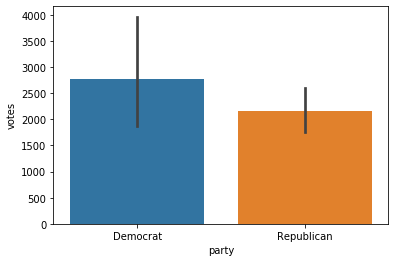

In [48]:
sns.barplot(x='party', y='votes', data=texas_prim)

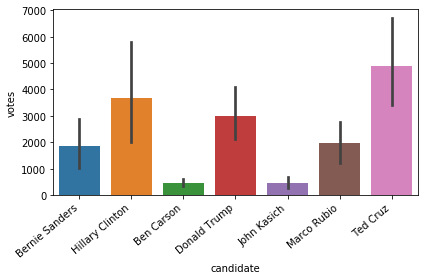

In [47]:
#plt.figure(figsize=(10,10))
ax = sns.barplot(x='candidate', y='votes', data=texas_prim)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

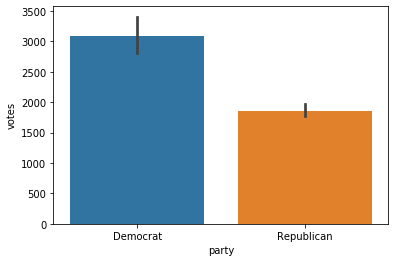

In [46]:
sns.barplot(x='party', y='votes', data=primary)

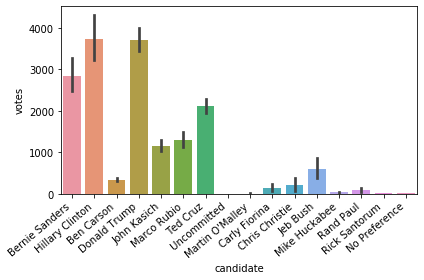

In [9]:
ax = sns.barplot(x='candidate', y='votes', data=primary)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Data Cleaning

In [12]:
prim = pd.merge(stats,primary)

In [13]:

prim.drop('county', axis=1, inplace=True)


In [14]:
prim = prim.rename(columns={'state_abbreviation': 'state1','area_name':'county'})

In [15]:
prim.drop('state', axis=1, inplace=True)


In [16]:
prim = prim.rename(columns={'state1': 'State'})

In [17]:
prim['Winner'] = np.where(prim['fraction_votes'] >  .43, 'Won','Lost' )
prim.loc[456:468]

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes,Winner
456,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,0.1,928,52.4,Democrat,Hillary Clinton,3337,0.843,Won
457,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,0.1,928,52.4,Republican,Ben Carson,44,0.083,Lost
458,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,0.1,928,52.4,Republican,Donald Trump,287,0.544,Won
459,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,0.1,928,52.4,Republican,John Kasich,12,0.023,Lost
460,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,0.1,928,52.4,Republican,Marco Rubio,64,0.121,Lost
461,1131,Wilcox County,AL,11098,17.7,71.0,1.0,27.6,76.1,11.1,23642,39.2,13.1,0.1,928,52.4,Republican,Ted Cruz,114,0.216,Lost
462,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,0.3,2380,50.9,Democrat,Bernie Sanders,138,0.304,Lost
463,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,0.3,2380,50.9,Democrat,Hillary Clinton,303,0.667,Won
464,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,0.3,2380,50.9,Republican,Ben Carson,539,0.090,Lost
465,1133,Winston County,AL,24150,20.0,1.0,2.9,94.0,72.7,10.4,32900,24.0,39.9,0.3,2380,50.9,Republican,Donald Trump,3352,0.561,Won


In [18]:
prim['Result'] = ''


In [19]:
prim.loc[prim['Winner'].str.contains('Won'), 'Result'] = prim['candidate']

prim.head()

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes,Winner,Result
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Bernie Sanders,544,0.182,Lost,
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800,Won,Hillary Clinton
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ben Carson,1764,0.146,Lost,
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445,Won,Donald Trump
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,John Kasich,421,0.035,Lost,


## Correlation Analysis

In [20]:
stats_cor = prim.corr()
stats_cor

,fips,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,votes,fraction_votes
fips,1.000000,-0.037495,0.019943,-0.137506,0.170682,-0.032102,-0.013721,0.076719,0.102318,-0.102272,0.035873,-0.041556,-0.043306,-0.036313,-0.021331,0.051565
Population,-0.037495,1.000000,-0.226313,0.071147,0.188129,-0.234110,0.078141,0.333290,0.250424,-0.070258,0.324428,0.488751,0.979427,0.106419,0.728027,0.037741
Age > 65,0.019943,-0.226313,1.000000,-0.224644,-0.228544,0.388685,0.111513,-0.240651,-0.275651,-0.093987,-0.126578,-0.296167,-0.192707,0.074976,-0.166208,-0.013614
Black,-0.137506,0.071147,-0.224644,1.000000,-0.117822,-0.644277,-0.339155,-0.072445,-0.250349,0.463803,0.089303,0.023418,0.060120,0.110335,0.062200,-0.021366
Latino,0.170682,0.188129,-0.228544,-0.117822,1.000000,-0.605044,-0.389901,0.015739,0.058993,0.095791,0.073013,0.163806,0.176763,-0.165225,0.103101,0.002899
White,-0.032102,-0.234110,0.388685,-0.644277,-0.605044,1.000000,0.490614,-0.016626,0.114165,-0.454508,-0.143122,-0.267044,-0.214741,0.023465,-0.152724,-0.000362
HighSchool,-0.013721,0.078141,0.111513,-0.339155,-0.389901,0.490614,1.000000,0.590446,0.574329,-0.660147,0.029871,0.178376,0.077209,0.133993,0.104978,0.022993
College,0.076719,0.333290,-0.240651,-0.072445,0.015739,-0.016626,0.590446,1.000000,0.688461,-0.407049,0.243085,0.538559,0.329311,0.187544,0.310550,0.043597
Median Household,0.102318,0.250424,-0.275651,-0.250349,0.058993,0.114165,0.574329,0.688461,1.000000,-0.765324,0.148918,0.457179,0.244616,0.024703,0.226869,0.024593
Poverty level,-0.102272,-0.070258,-0.093987,0.463803,0.095791,-0.454508,-0.660147,-0.407049,-0.765324,1.000000,-0.014062,-0.155548,-0.074147,0.015728,-0.081253,0.003784


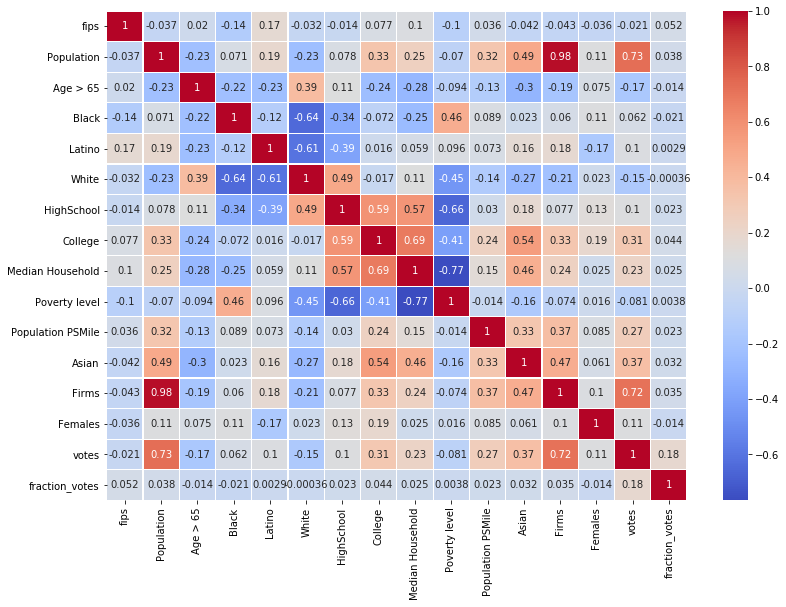

In [21]:
plt.subplots(figsize=(13,9))
sns.heatmap(stats_cor, cmap='coolwarm',linewidth=.2,linecolor='white',annot=True)

In [22]:
prim['Result'].replace('', np.nan, inplace=True)
prim.dropna(subset=['Result'], inplace=True)
prim.head()

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes,Winner,Result
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800,Won,Hillary Clinton
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445,Won,Donald Trump
8,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Democrat,Hillary Clinton,5290,0.647,Won,Hillary Clinton
10,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Republican,Donald Trump,23618,0.469,Won,Donald Trump
15,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6,Democrat,Hillary Clinton,2567,0.906,Won,Hillary Clinton


### Comparing the relationship between Median Household Income and White, Black, and Latino people

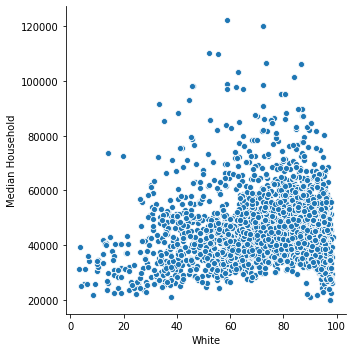

In [35]:
sns.relplot(x="White", y="Median Household", data=prim)

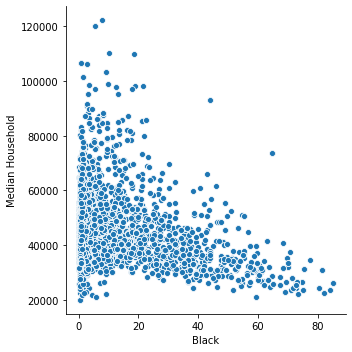

In [36]:
sns.relplot(x="Black", y="Median Household", data=prim)

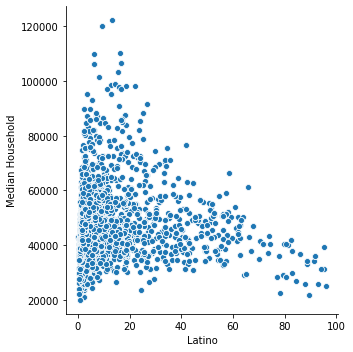

In [44]:
sns.relplot(x="Latino", y="Median Household", data=prim)

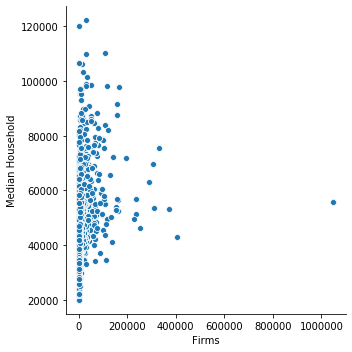

In [49]:
sns.relplot(x="Firms", y="Median Household", data=prim)

In [28]:
Dem =  prim[prim.party.str.contains("Democrat")]
Rep =  prim[prim.party.str.contains("Republican")]
Dem

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes,Winner,Result
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800,Won,Hillary Clinton
8,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2,Democrat,Hillary Clinton,5290,0.647,Won,Hillary Clinton
15,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6,Democrat,Hillary Clinton,2567,0.906,Won,Hillary Clinton
22,1007,Bibb County,AL,22506,14.8,22.1,2.1,74.5,77.5,12.1,36447,18.1,36.8,0.2,1385,45.9,Democrat,Hillary Clinton,942,0.755,Won,Hillary Clinton
29,1009,Blount County,AL,57719,17.0,1.8,8.7,87.8,77.0,12.1,44145,15.8,88.9,0.3,4458,50.5,Democrat,Hillary Clinton,564,0.551,Won,Hillary Clinton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17473,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Democrat,Bernie Sanders,5,0.556,Won,Bernie Sanders
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Democrat,Hillary Clinton,4,0.444,Won,Hillary Clinton
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Hillary Clinton,2,0.667,Won,Hillary Clinton
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Democrat,Bernie Sanders,1,0.500,Won,Bernie Sanders


### How many counties each candidate won in 2016

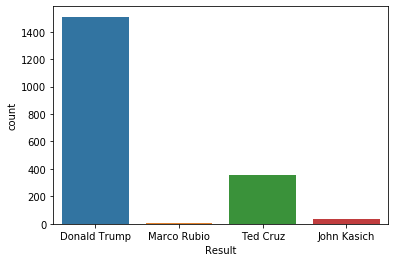

In [29]:
sns.countplot(x='Result', data=Rep)

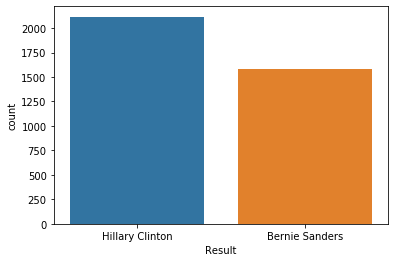

In [30]:
sns.countplot(x='Result', data=Dem)

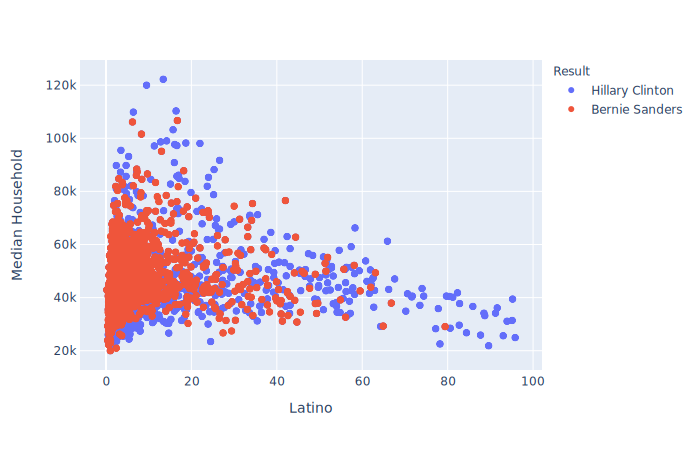

In [33]:
import plotly.express as px
fig = px.scatter(Dem, x='Latino', y='Median Household', color='Result',)
fig.show(renderer ='svg')

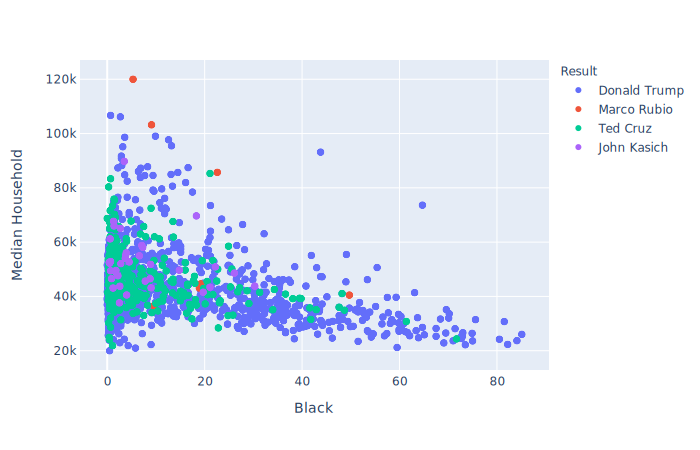

In [34]:
fig = px.scatter(Rep, x='Black', y='Median Household', color='Result',)
fig.show(renderer ='svg')

In [40]:
county_sum = prim.groupby(['county']).sum()
county_sum

,fips,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,votes,fraction_votes
county,,,,,,,,,,,,,,,,
Abbeville County,45001,24965,19.4,28.3,1.2,68.8,76.8,12.2,35947,21.6,51.8,0.4,1385,51.5,1501,0.818
Acadia Parish,44002,124972,27.0,36.6,4.4,155.6,144.2,20.4,75174,37.4,188.6,0.8,8578,103.0,3556,0.982
Accomack County,102002,66042,42.6,56.2,17.8,122.2,156.0,34.4,78656,41.0,147.6,1.4,5888,102.6,3857,1.199
Ada County,16001,426236,12.6,1.3,7.7,85.5,93.6,36.0,55210,13.1,372.8,2.6,42344,49.9,7336,0.805
Adair County,170007,120308,121.5,12.2,17.8,607.4,566.6,114.6,260645,126.4,249.7,4.7,11011,355.2,4812,3.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuba County,18345,221898,34.2,12.0,81.6,169.8,237.0,41.1,134706,64.8,342.6,21.9,12333,147.6,6512,1.803
Yuma County,16179,416696,52.2,5.8,145.3,142.4,231.8,46.3,127498,48.6,75.2,3.5,21347,147.6,8793,1.668
Zapata County,48505,14319,11.6,0.4,93.9,5.5,54.8,8.5,31109,34.7,14.0,0.2,1177,49.6,1969,0.678


In [42]:
average_result = prim.groupby(['Result']).mean()
average_result

,fips,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,votes,fraction_votes
Result,,,,,,,,,,,,,,,,
Bernie Sanders,31743.155303,81286.162247,17.871023,2.875568,7.101136,84.951073,86.490657,20.395076,46521.459596,15.664962,159.259722,1.290341,6873.877525,49.805177,3530.865530,0.540287
Donald Trump,29946.683897,104550.565275,18.273492,11.021935,7.027435,77.539165,83.332671,17.713651,43195.753479,18.094168,245.031213,1.313784,8897.155070,49.925977,5167.166998,0.579738
Hillary Clinton,30300.762760,117686.205104,17.513752,12.665784,10.168195,73.511248,83.172023,18.943384,45101.570416,17.479064,323.379395,1.404915,10119.244329,50.111342,6186.396503,0.597599
John Kasich,39004.944444,267679.333333,15.769444,7.094444,4.177778,85.488889,89.388889,24.419444,52526.444444,13.661111,2426.630556,1.758333,26467.166667,50.747222,19745.750000,0.482278
Marco Rubio,45885.285714,474959.285714,11.571429,19.200000,17.614286,55.657143,86.942857,51.457143,67659.428571,16.942857,5039.114286,5.842857,65760.285714,50.328571,19669.000000,0.489857
Ted Cruz,41908.949153,71016.257062,16.392655,7.203107,20.193503,69.829096,82.047175,18.206780,46381.141243,16.267514,94.688418,1.041525,5667.316384,49.520621,4681.237288,0.499720
